In [5]:
import pickle
import os
import sys

import numpy as np
import matplotlib.pyplot as plt


In [6]:
#Function that loads the pickle files into a dictionary with reward+curiosity as key
def load_pickle_files(r, c, dir_path):
    ""
    dict = {}
    with open(f"{dir_path}models/ppo_lending/500000_{c}{r}/{r}_actions_callback.pkl", "rb") as f:
        dict[f"{r}_{c}"] = pickle.load(f).__dict__

    return dict

In [14]:
dir_path = os.path.abspath(os.path.join(os.path.abspath('../..')))+"/"
dir_path

'/home/woutervdw2/Documents/thesis/code/ml-fairness-gym/'

In [42]:
curiosity = [0.5, 1.5, 3, 6]
reward = ['UCB', 'scalar', 'visit_count']
dict = {}
for c in curiosity:
    for r in reward:
        dict[f"{r}_{c}"] = load_pickle_files(r, c, dir_path)

In [43]:
len(dict['UCB_0.5']['UCB_0.5']['regret'])


1954

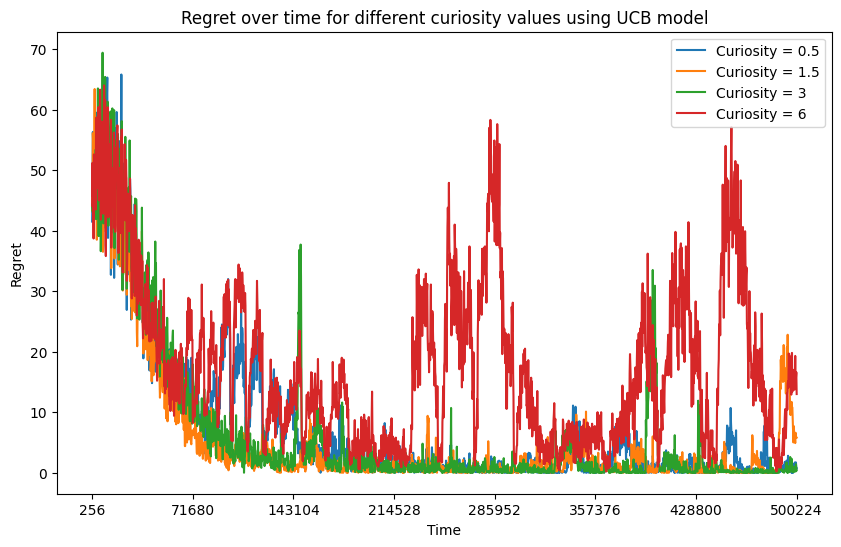

In [44]:
#Plot the regret over time for different values of curiosity
plt.figure(figsize=(10, 6))
for i, c in enumerate(curiosity):
    plt.plot(dict[f"UCB_{c}"][f"UCB_{c}"]['regret'], label=f'Curiosity = {c}')
plt.xlabel('Time')
plt.ylabel('Regret')
plt.legend()
nr_ticks = int(np.round(len(dict[f"UCB_{c}"][f"UCB_{c}"]['regret'])/7))
plt.xticks(ticks=np.arange(0, len(dict[f"UCB_{c}"][f"UCB_{c}"]['regret']), nr_ticks), labels=np.arange(256, (256*len(dict[f"UCB_{c}"][f"UCB_{c}"]['regret'])+1), nr_ticks*256))
plt.title('Regret over time for different curiosity values using UCB model')
plt.savefig(f"{dir_path}final_plots/regret/UCB_regret.png", bbox_inches='tight')
plt.show()  

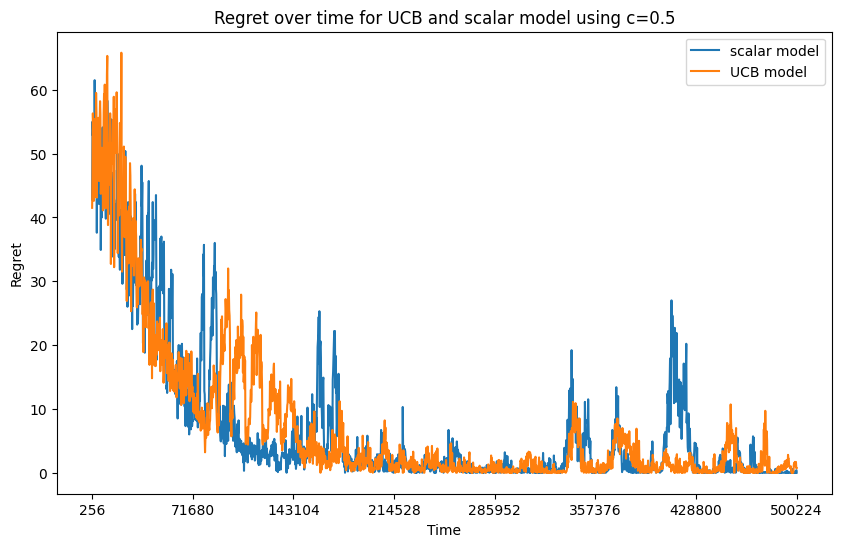

In [46]:
#Plot the regret over time for different values of curiosity
plt.figure(figsize=(10, 6))
curiosity = [0.5]
reward = ['scalar', 'UCB']
for i, c in enumerate(curiosity):
    for r in reward:
        plt.plot(dict[f"{r}_{c}"][f"{r}_{c}"]['regret'], label=f'{r} model')
plt.xlabel('Time')
plt.ylabel('Regret')
plt.legend()
nr_ticks = int(np.round(len(dict[f"UCB_{c}"][f"UCB_{c}"]['regret'])/7))
plt.xticks(ticks=np.arange(0, len(dict[f"UCB_{c}"][f"UCB_{c}"]['regret']), nr_ticks), labels=np.arange(256, (256*len(dict[f"UCB_{c}"][f"UCB_{c}"]['regret'])+1), nr_ticks*256))
plt.title(f'Regret over time for UCB and scalar model using c={c}')
# plt.savefig(f"{dir_path}final_plots/regret/UCB_regret.png", bbox_inches='tight')
plt.show()  

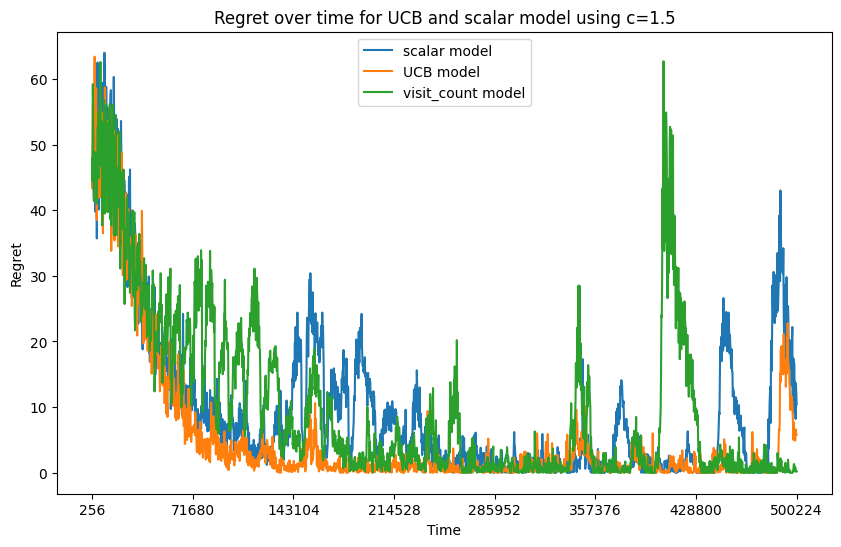

In [54]:
plt.figure(figsize=(10, 6))
curiosity = [1.5]
reward = ['scalar', 'UCB', 'visit_count']
for i, c in enumerate(curiosity):
    for r in reward:
        plt.plot(dict[f"{r}_{c}"][f"{r}_{c}"]['regret'], label=f'{r} model')
plt.xlabel('Time')
plt.ylabel('Regret')
plt.legend()
nr_ticks = int(np.round(len(dict[f"UCB_{c}"][f"UCB_{c}"]['regret'])/7))
plt.xticks(ticks=np.arange(0, len(dict[f"UCB_{c}"][f"UCB_{c}"]['regret']), nr_ticks), labels=np.arange(256, (256*len(dict[f"UCB_{c}"][f"UCB_{c}"]['regret'])+1), nr_ticks*256))
plt.title(f'Regret over time for UCB and scalar model using c={c}')
plt.savefig(f"{dir_path}final_plots/regret/UCB_scalar_visit_count.png", bbox_inches='tight')
plt.show()  